<a href="https://colab.research.google.com/github/ahmadalmasri270/Sales_Prediction/blob/main/Copy_of_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/sales_predictions.csv')

Mounted at /content/drive


###Display Data

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Cleaning

Rows and columns number 

In [ ]:

df.shape

(8523, 12)

Datatypes

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Check on the duplicates rows 

In [ ]:
df.duplicated().sum()
#df.nunique()

0

Missing values.

In [ ]:

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Drop the coulmn becouse its more than 5%

In [ ]:
#fillin the Outlet_Size withe forward values
#df['Outlet_Size']=df['Outlet_Size'].fillna(method='ffill', axis=0)
df = df.drop(columns=['Outlet_Size'])

In [ ]:
#fillin the Item_Weight
#median_weight = df['Item_Weight'].median()
#median_weight
df = df.drop(columns=['Item_Weight'])
#df['Item_Weight'].fillna(median_weight, inplace=True)

Confirm that there are no missing values 

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Fat Low', 'low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    3006
low Fat     428
Name: Item_Fat_Content, dtype: int64

In [ ]:
#df['Item_Identifier'].value_counts()
#df['Outlet_Size'].value_counts()
df.isna().sum()
df.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
all_avrage=df.agg(
    {
       # "Item_Weight": ["min", "max", "median", "mean"],
        "Item_MRP": ["min", "max", "median", "mean"],
        "Outlet_Establishment_Year":["min", "max", "median", "mean"],
        "Item_Outlet_Sales":["min", "max", "median", "mean"]
    }
)
all_avrage

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,31.290000,1985.000000,33.290000
max,266.888400,2009.000000,13086.964800
median,143.012800,1999.000000,1794.331000
mean,140.992782,1997.831867,2181.288914


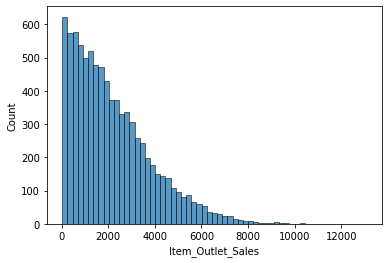

In [ ]:
sns.histplot(data = df, x = 'Item_Outlet_Sales');

Histplot show show Item Outlet Sales

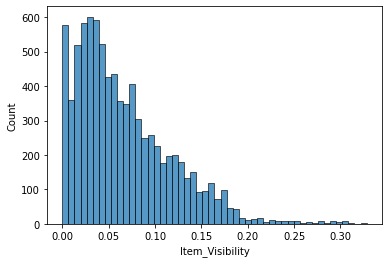

In [ ]:
sns.histplot(data = df, x = 'Item_Visibility');

Histplot show show Item Visibility


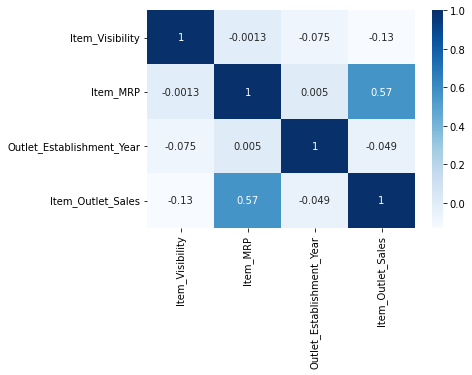

In [ ]:
sns.heatmap(df.corr(),annot=True , cmap='Blues')

Heat map for all the data set

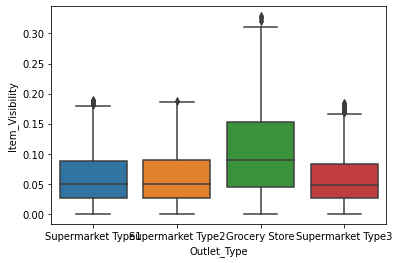

In [ ]:
sns.boxplot(y= 'Item_Visibility', x= 'Outlet_Type', data=df )
#plt.show()

Box plot show the relation beween Item Visibility and Outlet Type